In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [15]:
img = df.iloc[4, 1:].values

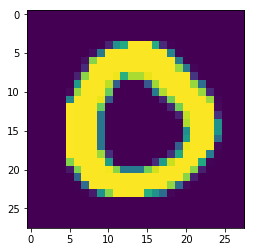

In [16]:
img=img.reshape(28,28)
plt.imshow(img)

In [17]:
x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
y_pred = classifier.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[825,   0,   1,   0,   0,   1,   4,   0,   7,   0],
       [  0, 911,   3,   0,   0,   0,   0,   1,   0,   0],
       [  5,   2, 770,   6,   4,   0,   3,   7,   3,   1],
       [  2,   0,   9, 869,   1,   6,   0,   3,  15,   6],
       [  2,   0,   1,   0, 844,   0,   3,   0,   1,  12],
       [  4,   2,   0,   4,   1, 718,   7,   0,   5,   5],
       [  2,   0,   2,   0,   1,   8, 826,   0,   5,   0],
       [  2,   3,  12,   0,   5,   0,   0, 855,   1,  17],
       [  0,   4,   3,   5,   2,   3,   1,   1, 785,  11],
       [  3,   2,   0,   8,   6,   2,   0,   4,   7, 740]])

In [29]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.9694047619047619

# for kaggle's Digit Recognizer


In [31]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [32]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
test.shape

(28000, 784)

In [35]:
x_train = df.iloc[:, 1:].values
y_train = df.iloc[:, 0].values

In [48]:
x_test = test.iloc[:, :].values

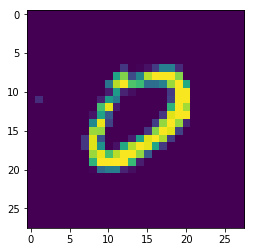

In [51]:
f = x_test[3]
f = f.reshape(28,28)
plt.imshow(f)

In [52]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
y_pred = classifier.predict(x_test)

In [54]:
y_pred.shape

(28000,)

In [55]:
import csv
with open('predictions1.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['ImageId', 'Label'])
    i=0
    for j in y_pred:
        i=i+1
        filewriter.writerow([i, j])